<a href="https://colab.research.google.com/github/UmarKhattab09/FareRidePrediction/blob/main/FareRidePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
df = pd.read_csv("cab_rides.csv")
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [98]:
df2=pd.read_csv("weather.csv")
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [99]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


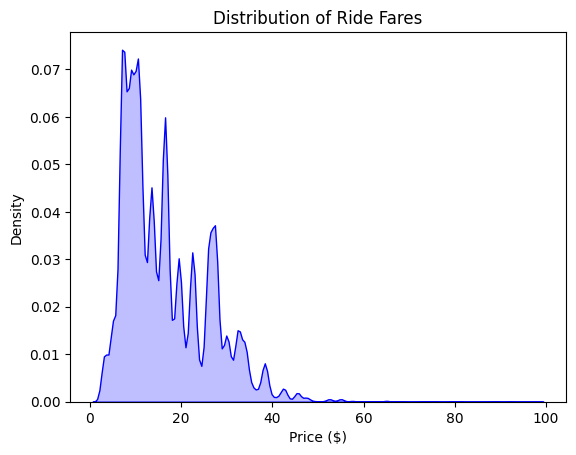

In [100]:
sns.kdeplot(df["price"], fill=True, color="blue")
plt.title("Distribution of Ride Fares")
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.show()

Text(0.5, 0, 'Cab Type')

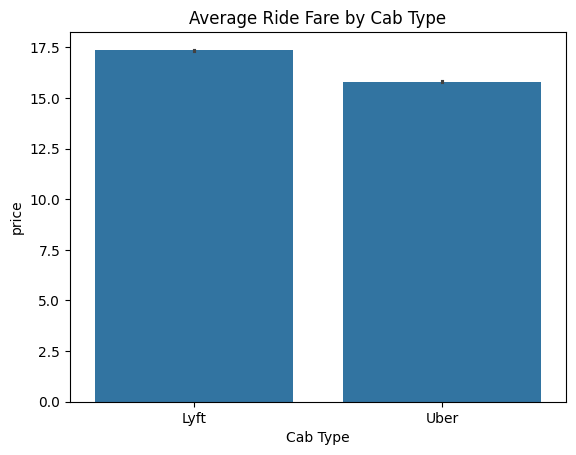

In [101]:
sns.barplot(x="cab_type", y="price", data=df)
plt.title("Average Ride Fare by Cab Type")
plt.xlabel("Cab Type")

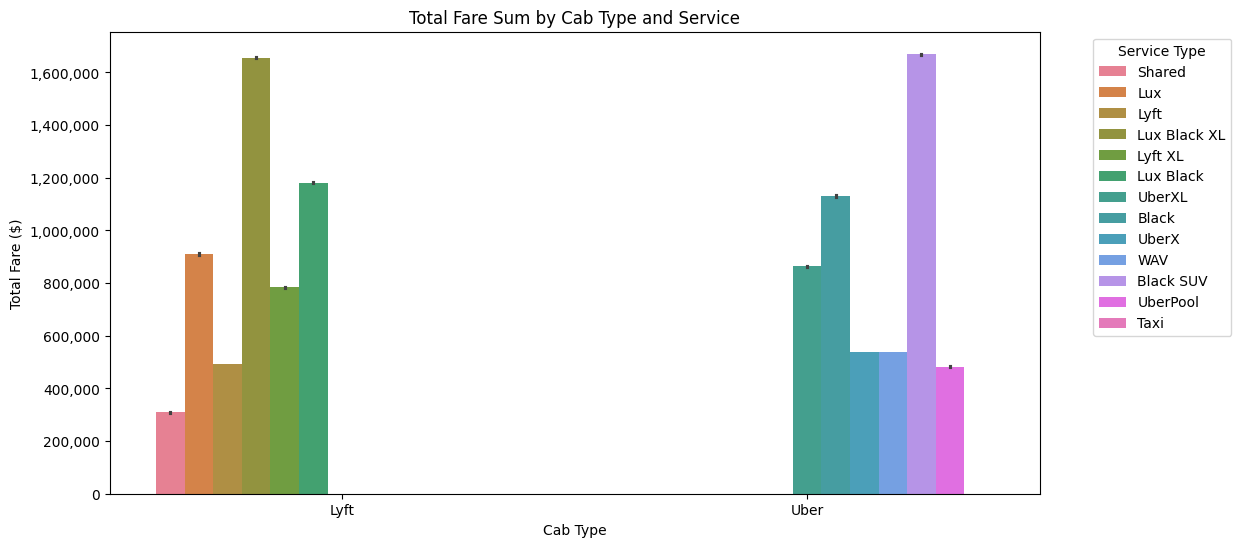

In [102]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="cab_type", y="price", hue="name", estimator=sum)

plt.title("Total Fare Sum by Cab Type and Service")
plt.xlabel("Cab Type")
plt.ylabel("Total Fare ($)")


plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend(title="Service Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [103]:
print(df['cab_type'].value_counts())
print(df["name"].value_counts())
print(df["product_id"].value_counts())

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64
name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64
product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft_luxsuv                             51235
lyft                                    51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: cou

In [104]:
## Label Encoding for Cab_Type
## OHE for service_type
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
df["cab_type_encoded"] = label_encoder.fit_transform(df["cab_type"])




In [105]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


surge_order = [[1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]]

ord_enc = OrdinalEncoder(categories=surge_order)
df['surge_encoded'] = ord_enc.fit_transform(df[['surge_multiplier']])

print(df[['surge_multiplier', 'surge_encoded']].head())


   surge_multiplier  surge_encoded
0               1.0            0.0
1               1.0            0.0
2               1.0            0.0
3               1.0            0.0
4               1.0            0.0


In [106]:
ohe = OneHotEncoder(sparse_output=False)
df["cab_type_encoded"] = label_encoder.fit_transform(df["cab_type"])
service_encoded = ohe.fit_transform(df[['name']])
service_encoded_df = pd.DataFrame(service_encoded, columns=ohe.get_feature_names_out(['name']))
df_final = pd.concat([df.drop('name', axis=1), service_encoded_df], axis=1)
print(df_final.head())

   distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymarket Square    9.0   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   
2               1.0  981a3613-77af-4620-a42a-0c0866077d1e          lyft   
3               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv   
4               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus   

   cab_type_encoded  ...  name_Lux Black  name_Lux Black XL  name_Lyft  \


In [107]:
df_final.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'cab_type_encoded',
       'surge_encoded', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'],
      dtype='object')

In [112]:
df = df_final.drop(["cab_type","time_stamp","destination","source","id","product_id"], axis=1)


In [113]:
df

,distance,price,surge_multiplier,cab_type_encoded,surge_encoded,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,5.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.44,11.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,7.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,26.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,9.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,13.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,1.00,9.5,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693068,1.00,NaN,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693069,1.00,27.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
df.isna().sum()
df.dropna(inplace=True)

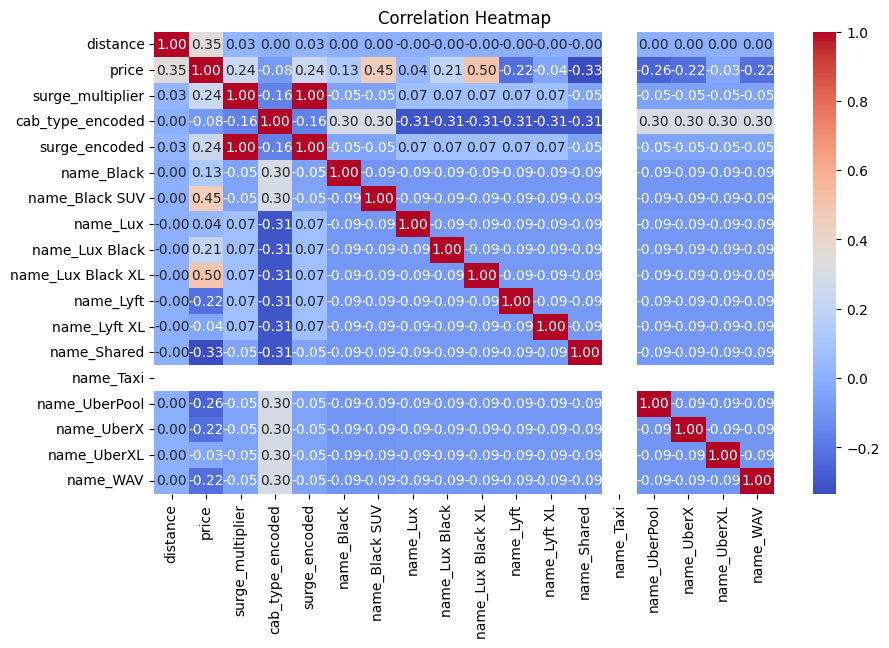

In [115]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [116]:
import statsmodels.api as sm

X = df.drop(["price"],axis=1)  # example predictors
y = df["price"]

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print("P-values for coefficients:")
print(model.pvalues)


P-values for coefficients:
const                 0.000000e+00
distance              0.000000e+00
surge_multiplier     2.541471e-160
cab_type_encoded     8.086326e-226
surge_encoded         0.000000e+00
name_Black            0.000000e+00
name_Black SUV        0.000000e+00
name_Lux              0.000000e+00
name_Lux Black        0.000000e+00
name_Lux Black XL     0.000000e+00
name_Lyft             0.000000e+00
name_Lyft XL          5.994203e-83
name_Shared           0.000000e+00
name_Taxi             0.000000e+00
name_UberPool         0.000000e+00
name_UberX            0.000000e+00
name_UberXL           1.140833e-77
name_WAV              0.000000e+00
dtype: float64


In [117]:
print(model.params)

const                2.622325e+01
distance             2.794528e+00
surge_multiplier    -1.951330e+01
cab_type_encoded     2.538324e+00
surge_encoded        9.578264e+00
name_Black           5.151591e+00
name_Black SUV       1.491463e+01
name_Lux             4.250837e+00
name_Lux Black       9.542065e+00
name_Lux Black XL    1.880368e+01
name_Lyft           -3.909209e+00
name_Lyft XL         1.789269e+00
name_Shared         -6.791720e+00
name_Taxi            1.464915e-15
name_UberPool       -6.619688e+00
name_UberX          -5.607097e+00
name_UberXL          3.060074e-01
name_WAV            -5.607117e+00
dtype: float64


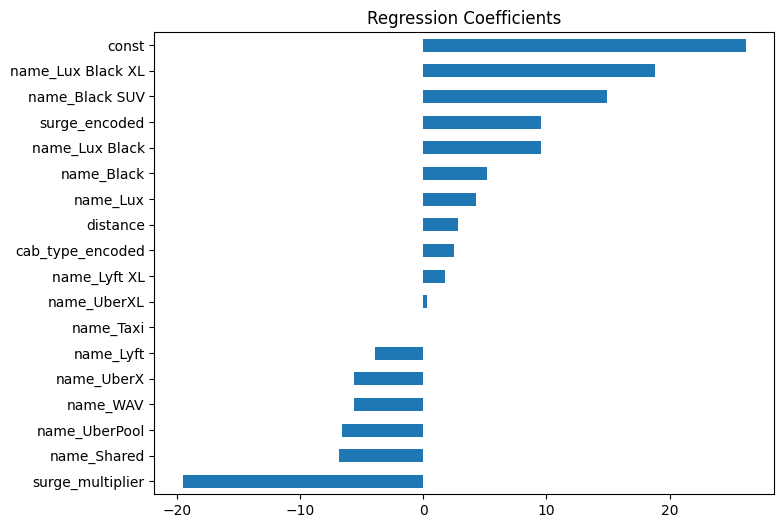

In [118]:
import matplotlib.pyplot as plt

model.params.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Regression Coefficients")
plt.show()


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Assuming df_final is your fully preprocessed dataframe
X = df.drop('price', axis=1)
y = df['price']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))


Linear Regression:
R2 Score: 0.9277809545151517
MSE: 6.296086905013962
RMSE: 2.509200451341814
MAE: 1.7756221272719974


In [123]:
ridge_reg = Ridge(alpha=1.0)  # alpha is regularization strength
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

print("\nRidge Regression:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))



Ridge Regression:
R2 Score: 0.9277767338859086
MSE: 6.296454861255007
RMSE: 2.5092737716827567
MAE: 1.775637414467621


In [124]:
lasso_reg = Lasso(alpha=0.1)  # alpha is regularization strength
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

print("\nLasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))



Lasso Regression:
R2 Score: 0.9125914803711902
MSE: 7.620311679930282
RMSE: 2.760491202654028
MAE: 1.8956746120786645


In [127]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# Initialize model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit model
rf_reg.fit(X_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
print("Random Forest Regression:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest Regression:
R2 Score: 0.9656824980797742
MSE: 2.9918143199227947
RMSE: 1.729686191169599
MAE: 1.1310089490672017


In [128]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

print("\nXGBoost Regression:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))



XGBoost Regression:
R2 Score: 0.964940340159986
MSE: 3.0565159610046084
RMSE: 1.748289438566912
MAE: 1.1553833510487868


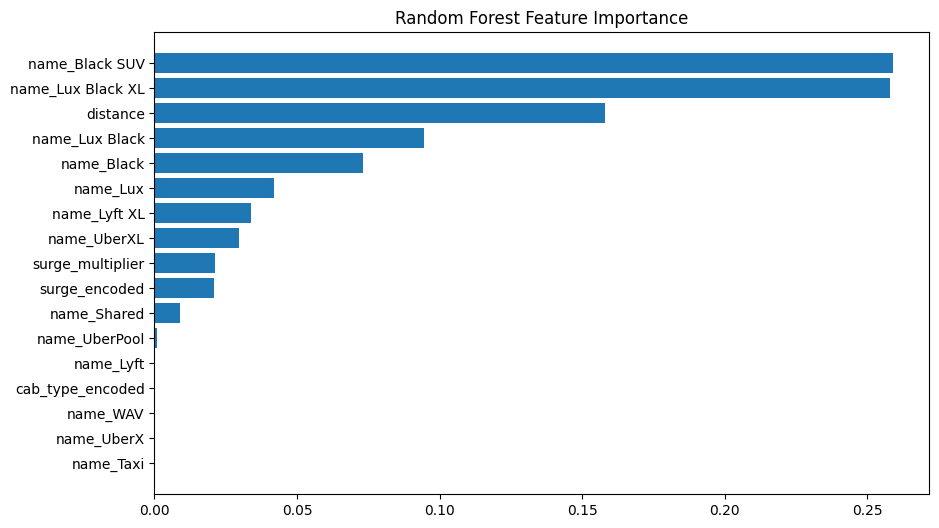

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_reg.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance['feature'], feat_importance['importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.show()


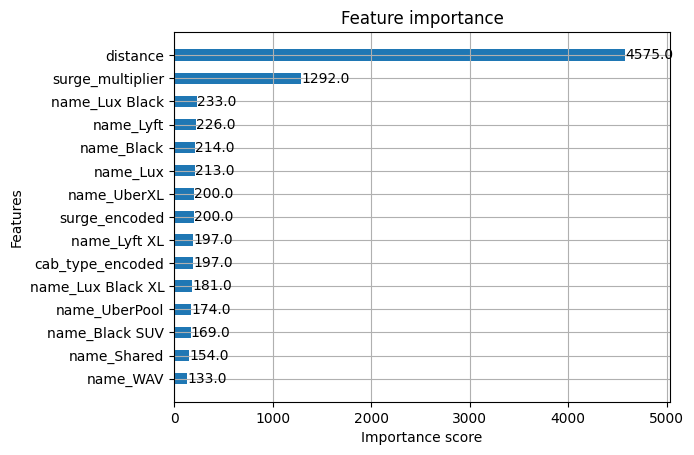

In [130]:
xgb.plot_importance(xgb_reg, max_num_features=15, height=0.5)
plt.show()